In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

import os

In [15]:
def decode_fn(example):
    image = example["image"]
    image = tf.cast(image,tf.float32) * 1./255
    label = example["label"]
    label = tf.one_hot(label,10)
    return image, label

batch_size = 128
ds_name = 'cifar10'
tr_ds, te_ds = tfds.load(ds_name,
                         batch_size = 1,
                         split = ['train', 'test'],
                         shuffle_files = True)

tr_ds = tr_ds.map(decode_fn).take(1)

(1, 32, 32, 3)


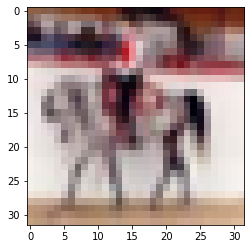

In [17]:
for image, label in tr_ds:
    print(image.shape)
    plt.imshow(image[0])
    plt.show()

In [31]:
p = 16
B, H, W, C = image.shape

flatten = tf.keras.layers.Flatten()

patch_list = []
for p_i in range(0, H, p):
    for p_j in range(0, W, p):
        patch = image[:, p_i:p_i+p, p_j:p_j+p, :]
        patch_list.append(flatten(patch))
patchs = tf.stack(patch_list, axis = 1)
print(patchs.shape)

(1, 4, 768)


In [32]:
num_of_class = 10

linear_proj = tf.keras.layers.Dense(units = num_of_class, activation=None, use_bias=False)

x_p_E = linear_proj(patchs)

print(x_p_E.shape)

(1, 4, 10)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

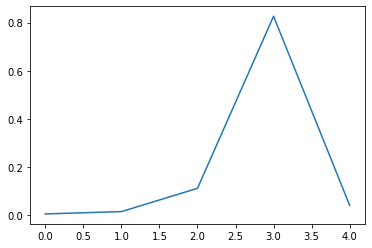

In [5]:
v = np.array([1,2,4,6,3])
softmax = np.exp(v)/np.sum(np.exp(v))
plt.plot(softmax)
plt.show()

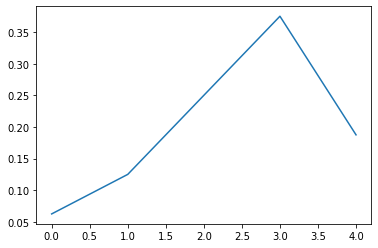

In [6]:
v = np.array([1,2,4,6,3])
softmax = v/np.sum(v)
plt.plot(softmax)
plt.show()

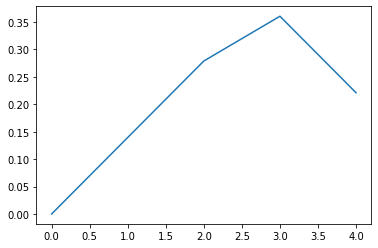

In [8]:
v = np.array([1,2,4,6,3])
logmax = np.log(v)/np.sum(np.log(v))
plt.plot(logmax)
plt.show()

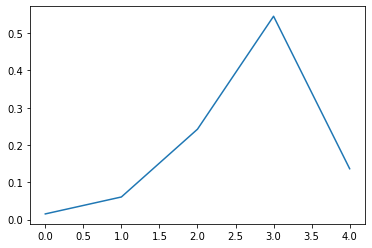

In [9]:
v = np.array([1,2,4,6,3])
sqmax = v**2/np.sum(v**2)
plt.plot(sqmax)
plt.show()

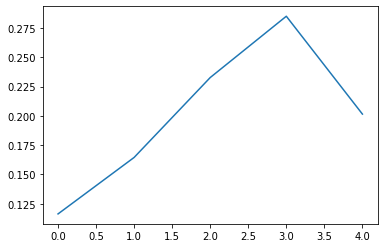

In [11]:
v = np.array([1,2,4,6,3])
sqrtmax = np.sqrt(v)/np.sum(np.sqrt(v))
plt.plot(sqrtmax)
plt.show()